# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Hardianto Tandi Seno
- **Email:** hardiantotandiseno@gmail.com / a208yaf202@devacademy.id
- **ID Dicoding:** hts101002

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Menentukan Pertanyaan Bisnis

- Bagaimana demografi pelanggan e-commerce berdasarkan lokasi geografisnya?
- Wilayah apa saja yang menghasilkan pendapatan penjualan tertinggi?
- Bagaimana tren penjualan bulanan dua tahun terakhir di e-commerce tersebut?
- Bagaimana kontribusi kategori produk terhadap pendapatan?
- Wilayah mana yang mengalami rata-rata keterlambatan pengiriman paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Import masing-masing dataset yang diperlukan untuk menjawab pertanyaan bisnis yang ada

In [109]:
# Melakukan import customer dataset
customer_df = pd.read_csv("/content/drive/MyDrive/Dataset e-commerce/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [110]:
# Melakukan import orders dataset
orders_df = pd.read_csv("/content/drive/MyDrive/Dataset e-commerce/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [111]:
# Melakukan import order payment dataset
order_payments_df = pd.read_csv("/content/drive/MyDrive/Dataset e-commerce/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [112]:
# Melakukan import order items dataset
order_items_df = pd.read_csv("/content/drive/MyDrive/Dataset e-commerce/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [113]:
# Melakukan import product dataset
products_df = pd.read_csv("/content/drive/MyDrive/Dataset e-commerce/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [114]:
# Melakukan import product category name dataset
product_category_name_df = pd.read_csv("/content/drive/MyDrive/Dataset e-commerce/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Melakukan penggabungan dataset yang diperlukan agar dataset yang digunakan berfokus langsung pada pertanyaan yang akan dijawab

In [115]:
# Membuat fungsi untuk merging pada beberapa dataset
def merging_dataset(df1, df2, name_column, how_to_merge):
  if len(name_column) > 1:
    df_merged = pd.merge(df1, df2, left_on=name_column[0], right_on=name_column[1], how=how_to_merge)
  else:
    df_merged = pd.merge(df1, df2, on=name_column[0], how=how_to_merge)

  print(df_merged.shape)
  return df_merged

In [116]:
# Menggabungkan orders & order payment dataset
orders_sales_df = merging_dataset(orders_df, order_payments_df, ['order_id'], 'inner')
orders_sales_df.head()

(103886, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [117]:
# Menggabungkan orders sales dataset dengan customer dataset
customer_orders_df = merging_dataset(customer_df, orders_sales_df, ['customer_id'], 'inner')
customer_orders_df.head()

(103886, 16)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,credit_card,8,252.25


In [118]:
# Menggabungkan order items, products dataset, & customer orders dataset
customer_orders_with_sales_category_df = merging_dataset(customer_orders_df, order_items_df, ['order_id'], 'inner')
customer_orders_with_sales_category_df = merging_dataset(customer_orders_with_sales_category_df, products_df, ['product_id'], 'inner')
customer_orders_with_sales_category_df = merging_dataset(customer_orders_with_sales_category_df, product_category_name_df, ['product_category_name'], 'left')
customer_orders_with_sales_category_df.head()

(117601, 22)
(117601, 30)
(117601, 31)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


#### Insight yang diperoleh dari hasil assessing data

**Insight:**
- Dari pertanyaan bisnis yang telah disepakati, terdapat 6 dataset yang akan digunakan (customer, orders, order_payments, order_items, products, product_category_name_translation) untuk menjawab pertanyaan-pertanyaan terkait masalah yang coba diselesaikan
- Selain itu, dilakukan metode penggabungan data (merge) beberapa dataset untuk mempermudah dalam analisis lanjutan yang nantinya dapat menjawab pertanyaan-pertanyaan bisnis.

### Assessing Data

#### Pengecekan adanya noise/masalah pada customer dataset

In [119]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [120]:
print("Jumlah data yang terduplikasi: ", customer_df.duplicated().sum())

Jumlah data yang terduplikasi:  0


Tidak data data yang terduplikasi dan missing value (terlihat dari info)

#### Pengecekan adanya noise/masalah pada orders dataset

In [121]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [122]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [123]:
print("Jumlah data yang terduplikasi: ", orders_df.duplicated().sum())

Jumlah data yang terduplikasi:  0


Hasilnya menyatakan tidak ada data yang terduplikasi, namun terdapat missing value pada beberapa kolom (order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date)

Selain itu, tipe data pada kolom terkait dengan datetime (setelah kolom order_status) masih bertipe object

#### Pengecekan adanya noise/masalah pada orders payments dataset

In [124]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [125]:
print("Jumlah data yang terduplikasi: ", order_payments_df.duplicated().sum())

Jumlah data yang terduplikasi:  0


In [126]:
order_payments_df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [127]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Hasilnya tidak ada data yang terduplikat dan missing value. Selain itu nilai pada setiap kolom numerik masih berada di batas normal

#### Pengecekan adanya noise/masalah pada order items dataset

In [128]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [129]:
print("Jumlah data yang terduplikasi: ", order_items_df.duplicated().sum())

Jumlah data yang terduplikasi:  0


In [130]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Hasilnya tidak ada missing value dan data yang terduplikat. Namun, tipe data pada shipping_limit_date masih berbentuk object (isi datanya berformat datetime). Selain itu, untuk kolom numerik tidak memperlihatkan adanya nilai yang tidak sesuai dengan background knowledge-nya

#### Pengecekan adanya noise/masalah pada product dataset

In [131]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [132]:
print("Jumlah data yang terduplikasi: ", products_df.duplicated().sum())

Jumlah data yang terduplikasi:  0


In [133]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [134]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Hasilnya menunjukkan tidak adanya data yang terduplikat. Namun terdapat missing value pada beberapa kolom

#### Pengecekan adanya noise/masalah pada product category name dataset

In [135]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [136]:
product_category_name_df['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [137]:
print("Jumlah data yang terduplikasi: ", product_category_name_df.duplicated().sum())

Jumlah data yang terduplikasi:  0


Hasilnya menyatakan tidak ada data yang terduplikat dan missing value

#### Pengecekan adanya noise/masalah pada hasil akhir penggabungan dataset

In [138]:
customer_orders_with_sales_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117601 non-null  object 
 1   customer_unique_id             117601 non-null  object 
 2   customer_zip_code_prefix       117601 non-null  int64  
 3   customer_city                  117601 non-null  object 
 4   customer_state                 117601 non-null  object 
 5   order_id                       117601 non-null  object 
 6   order_status                   117601 non-null  object 
 7   order_purchase_timestamp       117601 non-null  object 
 8   order_approved_at              117586 non-null  object 
 9   order_delivered_carrier_date   116356 non-null  object 
 10  order_delivered_customer_date  115034 non-null  object 
 11  order_estimated_delivery_date  117601 non-null  object 
 12  payment_sequential            

In [139]:
print("Jumlah data yang terduplikasi: ", customer_orders_with_sales_category_df.duplicated().sum())

Jumlah data yang terduplikasi:  0


In [140]:
customer_orders_with_sales_category_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1245


In [141]:
customer_orders_with_sales_category_df.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,115903.000000,115903.000000,115903.000000,117581.000000,117581.000000,117581.000000,117581.000000
mean,35051.793097,1.093528,2.939482,172.686752,1.195900,120.824783,20.045990,48.767590,786.950855,2.207881,2114.309497,30.257235,16.630306,23.068574
std,29820.588877,0.726692,2.774223,267.592290,0.697706,184.479323,15.861315,10.035011,653.036231,1.719531,3788.798201,16.190920,13.458952,11.748468
min,1003.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11310.000000,1.000000,1.000000,60.870000,1.000000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24315.000000,1.000000,2.000000,108.210000,1.000000,74.900000,16.290000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,58600.000000,1.000000,4.000000,189.260000,1.000000,134.900000,21.190000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99990.000000,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Hasil dari dataset ini menyatakan bahwa tidak ada data yang terduplikat, namun terdapat missing value pada beberapa kolom serta tipe data yang tidak sesuai dengan format dalam datanya (harusnya berbentuk datetime)

#### Insight yang diperoleh dari hasil assessing data

**Insight:**
- Dari hasil assessing data pada 7 dataset (1 dari hasil penggabungan), hanya terdapat 3 dataset yang tidak memiliki masalah didalamnya (customer, orders payment, product category name)
- Masalah yang terdapat dalam data diantaranya:
      1. Missing Value (orders, product, customer orders with sales category)
      2. Tipe data yang tidak sesuai (orders, order items, customer orders with sales category)

### Cleaning Data

#### Mengubah tipe data object menjadi datetime

In [142]:
def change_dtype_object_to_datetime(df, column_name):
  for i in column_name:
    df[i] = pd.to_datetime(df[i]).dt.floor('D')

  return df

In [143]:
# Mengubah object menjadi datetime pada orders_df
orders_df = change_dtype_object_to_datetime(orders_df, ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [144]:
# Mengubah object menjadi datetime pada order_items_df
order_items_df = change_dtype_object_to_datetime(order_items_df, ['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [145]:
# Mengubah object menjadi datetime pada customer_orders_with_sales_category_df
customer_orders_with_sales_category_df = change_dtype_object_to_datetime(customer_orders_with_sales_category_df,
                                                                          ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date',
                                                                           'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date'])
customer_orders_with_sales_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117601 non-null  object        
 1   customer_unique_id             117601 non-null  object        
 2   customer_zip_code_prefix       117601 non-null  int64         
 3   customer_city                  117601 non-null  object        
 4   customer_state                 117601 non-null  object        
 5   order_id                       117601 non-null  object        
 6   order_status                   117601 non-null  object        
 7   order_purchase_timestamp       117601 non-null  datetime64[ns]
 8   order_approved_at              117586 non-null  datetime64[ns]
 9   order_delivered_carrier_date   116356 non-null  datetime64[ns]
 10  order_delivered_customer_date  115034 non-null  datetime64[ns]
 11  

#### Mengatasi Missing Value pada Data

In [146]:
# Mengatasi missing value pada orders_df (order_approved_at, order_delivered_carrier_date, order_delivered_customer_date)
def get_missing_order_counts(orders_df, list_columns):
  for i in list_columns:
    missing_counts = orders_df[orders_df[i].isna()].groupby('order_status').size()
    print(missing_counts, '\n')

In [147]:
list_columns = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

get_missing_order_counts(orders_df, list_columns)

order_status
canceled     141
created        5
delivered     14
dtype: int64 

order_status
approved         2
canceled       550
created          5
delivered        2
invoiced       314
processing     301
unavailable    609
dtype: int64 

order_status
approved          2
canceled        619
created           5
delivered         8
invoiced        314
processing      301
shipped        1107
unavailable     609
dtype: int64 



In [148]:
# Menghapus missing value pada orders_df di kolom 'order_delivered_customer_date' dengan status canceled & unavailable dengan alasan seharusnya kedua status tidak akan sampai ke pembeli
orders_df_cleaned = orders_df[~((orders_df['order_status'].isin(['canceled', 'unavailable'])) & (orders_df['order_delivered_customer_date'].isna()))]

orders_df_cleaned.isna().sum()


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,19
order_delivered_carrier_date,624
order_delivered_customer_date,1737
order_estimated_delivery_date,0


In [149]:
# Mengecek lagi sisa missing value pada dua kolom
get_missing_order_counts(orders_df_cleaned, list_columns)

order_status
created       5
delivered    14
dtype: int64 

order_status
approved        2
created         5
delivered       2
invoiced      314
processing    301
dtype: int64 

order_status
approved         2
created          5
delivered        8
invoiced       314
processing     301
shipped       1107
dtype: int64 



In [150]:
# Melakukan imputasi pada data dengan status delivered
def imputation_missing_value(df):
  for_imputation = df['order_status'].isin(['delivered'])
  df.loc[for_imputation, 'order_approved_at'] = df.loc[for_imputation, 'order_approved_at'].fillna(df['order_purchase_timestamp'])
  df.loc[for_imputation, 'order_delivered_carrier_date'] = df.loc[for_imputation, 'order_delivered_carrier_date'].fillna(df['order_approved_at'])
  df.loc[for_imputation, 'order_delivered_customer_date'] = df.loc[for_imputation, 'order_delivered_customer_date'].fillna(df['order_approved_at'])

  return df

orders_df_cleaned = imputation_missing_value(orders_df_cleaned)

get_missing_order_counts(orders_df_cleaned, list_columns)

order_status
created    5
dtype: int64 

order_status
approved        2
created         5
invoiced      314
processing    301
dtype: int64 

order_status
approved         2
created          5
invoiced       314
processing     301
shipped       1107
dtype: int64 



In [151]:
# Status created, processing approved, dan shipped diganti dengan format datetime (NaT) (karena bergantung pada proses pengiriman dan berupa datetime)
orders_df_cleaned['order_approved_at'] = orders_df_cleaned['order_approved_at'].fillna(pd.NaT)
orders_df_cleaned['order_delivered_carrier_date'] = orders_df_cleaned['order_delivered_carrier_date'].fillna(pd.NaT)
orders_df_cleaned['order_delivered_customer_date'] = orders_df_cleaned['order_delivered_customer_date'].fillna(pd.NaT)

<ipython-input-151-f8f3de83ebe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df_cleaned['order_approved_at'] = orders_df_cleaned['order_approved_at'].fillna(pd.NaT)
<ipython-input-151-f8f3de83ebe6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df_cleaned['order_delivered_carrier_date'] = orders_df_cleaned['order_delivered_carrier_date'].fillna(pd.NaT)
<ipython-input-151-f8f3de83ebe6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [152]:
# Mengatasi missing value pada product_df
# Menghapus semua missing value pada product_df untuk memastikan kebersihan data dikarenakan data yang hilang berupa info-info terkait produk
products_df_cleaned = products_df.dropna()
products_df_cleaned.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [153]:
# Menghilangkan dan imputasi pada hasil akhir penggabungan dataset

customer_orders_with_sales_category_df_cleaned = customer_orders_with_sales_category_df[~((customer_orders_with_sales_category_df['order_status'].isin(['canceled', 'unavailable'])) & (customer_orders_with_sales_category_df['order_delivered_customer_date'].isna()))]
customer_orders_with_sales_category_df_cleaned = imputation_missing_value(customer_orders_with_sales_category_df_cleaned)

get_missing_order_counts(customer_orders_with_sales_category_df_cleaned, list_columns)


Series([], dtype: int64) 

order_status
approved        3
invoiced      371
processing    375
dtype: int64 

order_status
approved         3
invoiced       371
processing     375
shipped       1244
dtype: int64 



In [154]:
customer_orders_with_sales_category_df_cleaned['order_delivered_carrier_date'] = customer_orders_with_sales_category_df_cleaned['order_delivered_carrier_date'].fillna(pd.NaT)
customer_orders_with_sales_category_df_cleaned['order_delivered_customer_date'] = customer_orders_with_sales_category_df_cleaned['order_delivered_customer_date'].fillna(pd.NaT)

customer_orders_with_sales_category_df_cleaned = customer_orders_with_sales_category_df_cleaned.dropna(subset=['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght',
                                                                                                               'product_photos_qty', 'product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm', 'product_category_name_english'])

<ipython-input-154-9ae7ad8c3e35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_orders_with_sales_category_df_cleaned['order_delivered_carrier_date'] = customer_orders_with_sales_category_df_cleaned['order_delivered_carrier_date'].fillna(pd.NaT)
<ipython-input-154-9ae7ad8c3e35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_orders_with_sales_category_df_cleaned['order_delivered_customer_date'] = customer_orders_with_sales_category_df_cleaned['order_delivered_customer_date'].fillna(pd.N

In [155]:
customer_orders_with_sales_category_df_cleaned.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,724


#### Insight yang diperoleh dari hasil assessing data

- Semua dataset yang isi kolomnya berupa format datetime namun tipe datanya masih object telah diubah semua menjadi bertipe data datetime64 (orders, order items, customer orders with sales category)
- Untuk product dataset yang memiliki missing value diputuskan untuk dihilangkan datanya. Sedangkan untuk orders dataset ada yang dihilangkan,diisi kembali nilainya, dan dibiarkan (hanya mengubah dengan pd.NaT agar tetap berformat datetimes) sesuai dengan status ordernya.
- Untuk hasil penggabungan akhir 6 dataset menerapkan hal-hal diatas untuk menangani missing value. Dengan demikian, hasil akhirnya akan terdapat 2 kolom dengan missing value dikarenakan pd.NaT akan dideteksi juga sebagai nilai kosong

## Exploratory Data Analysis (EDA)

### Explore ...

Untuk eksplorasi ini, dataset yang digunakan berupa hasil penggabungan akhir (customer orders with sales category) karena telah terkandung semua kolom dari 6 dataset yang ada

#### Eksplorasi banyak orderan berdasarkan order status

In [156]:
# Mengeksplorasi banyaknya orderan berdasarkan order status
order_status_counts = customer_orders_with_sales_category_df_cleaned['order_status'].value_counts()
order_status_counts

,count
order_status,
delivered,113383
shipped,1214
processing,362
invoiced,359
canceled,7
approved,3


In [157]:
# Membuat fungsi untuk mencari tahu alasan lebih banyaknya orderan
def search_delivery_status(df, column_name, value, new_column1, new_column2):
  new_df = df[df[column_name] == value]
  new_df[new_column1] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
  new_df[new_column2] = new_df[new_column1].apply(lambda x: 'delay' if x > 0 else 'not delay')

  return new_df

In [158]:
delivered_orders = search_delivery_status(customer_orders_with_sales_category_df_cleaned, 'order_status', 'delivered','delivery_delay', 'delivery_status')

<ipython-input-157-64de43ea8a87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[new_column1] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
<ipython-input-157-64de43ea8a87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[new_column2] = new_df[new_column1].apply(lambda x: 'delay' if x > 0 else 'not delay')


In [159]:
delivered_orders['delivery_status'].value_counts()

,count
delivery_status,
not delay,105976
delay,7407


#### Eksplorasi total pembayaran dan pengguna metode pembayaran terbanyak berdasarkan tipe pembayarannya

In [160]:
# Mengeksplorasi total pembayaran dan pengguna metode pembayaran terbanyak berdasarkan tipe pembayarannya
customer_orders_with_sales_category_df_cleaned.groupby('payment_type').agg({'payment_value': ['sum', 'count']}).sort_values(('payment_value', 'sum'), ascending=False)

payment_value       
                       sum  count
payment_type                     
credit_card    15284585.68  85098
boleto          3970505.65  22450
voucher          395747.81   6128
debit_card       246432.91   1652

In [161]:
# Melihat opsi cicilan yang bisa diterapkan pada masing-masing metode pembayaran
customer_orders_with_sales_category_df_cleaned.groupby(['payment_installments', 'payment_type']).size().unstack(fill_value=0)

payment_type,boleto,credit_card,debit_card,voucher
payment_installments,,,,
0,0,3,0,0
1,22450,27213,1652,6128
2,0,13419,0,0
3,0,11517,0,0
4,0,7845,0,0
5,0,5916,0,0
6,0,4532,0,0
7,0,1787,0,0
8,0,4974,0,0


#### Eksplorasi demografi pelanggan berdasarkan lokasi geografisnya

In [162]:
# Mengeksplorasi distribusi pelanggan berdasarkan lokasi geografisnya
customers_per_state = customer_orders_with_sales_category_df_cleaned.groupby('customer_state')['customer_unique_id'].nunique().reset_index()
orders_per_state = customer_orders_with_sales_category_df_cleaned.groupby('customer_state')['order_id'].nunique().reset_index()
customers_per_city = customer_orders_with_sales_category_df_cleaned.groupby('customer_city')['customer_unique_id'].nunique().reset_index()

In [163]:
# Melihat distribusi customer berdasarkan state
customers_per_state.sort_values('customer_unique_id', ascending=False).head(10)

,customer_state,customer_unique_id
25,SP,39221
18,RJ,12063
10,MG,10977
22,RS,5154
17,PR,4756
23,SC,3448
4,BA,3203
6,DF,2027
7,ES,1934
8,GO,1888


In [164]:
# Melihat distribusi customer berdasarkan orderannya di tiap state
orders_per_state.sort_values('order_id', ascending=False).head(10)

,customer_state,order_id
25,SP,40562
18,RJ,12509
10,MG,11328
22,RS,5334
17,PR,4912
23,SC,3543
4,BA,3300
6,DF,2089
7,ES,2001
8,GO,1951


In [165]:
# Melihat distribusi customer berdasarkan kota
customers_per_city.sort_values('customer_unique_id', ascending=False).head(10)

,customer_city,customer_unique_id
3575,sao paulo,14534
3135,rio de janeiro,6444
451,belo horizonte,2595
556,brasilia,2022
1139,curitiba,1432
704,campinas,1365
2944,porto alegre,1297
3227,salvador,1181
1523,guarulhos,1118
3408,sao bernardo do campo,876


#### Eksplorasi wilayah dengan pendapatan penjualan tertinggi

In [166]:
# Mengeksplorasi wilayah dengan pendapatan penjualan tertinggi
revenue_per_state = customer_orders_with_sales_category_df_cleaned.groupby('customer_state')['payment_value'].sum().reset_index()
revenue_per_city = customer_orders_with_sales_category_df_cleaned.groupby('customer_city')['payment_value'].sum().reset_index()

In [167]:
# Melihat wilayah dengan pendapatan penjualan tertinggi berdasarkan state
revenue_per_state.sort_values('payment_value', ascending=False).head(10)

,customer_state,payment_value
25,SP,7448810.65
18,RJ,2721409.25
10,MG,2283632.39
22,RS,1106546.61
17,PR,1038851.74
4,BA,781527.15
23,SC,774658.07
8,GO,491618.10
6,DF,423347.96
7,ES,401766.93


In [168]:
# Melihat wilayah dengan pendapatan penjualan tertinggi berdasarkan kota
revenue_per_city.sort_values('payment_value', ascending=False).head(10)

,customer_city,payment_value
3575,sao paulo,2772262.07
3135,rio de janeiro,1544149.81
451,belo horizonte,488427.65
556,brasilia,421257.75
1139,curitiba,322666.65
2944,porto alegre,295727.12
3227,salvador,283648.86
704,campinas,261423.30
1523,guarulhos,201557.62
1439,goiania,197516.68


#### Eksplorasi besaran orderan bulanan

In [169]:
# Mengeksplorasi besaran orderan yang didapatkan setiap bulannya

customer_orders_with_sales_category_df_cleaned['order_purchase_month'] = customer_orders_with_sales_category_df_cleaned['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = customer_orders_with_sales_category_df_cleaned.groupby('order_purchase_month')['order_id'].nunique().reset_index()
monthly_revenue = customer_orders_with_sales_category_df_cleaned.groupby('order_purchase_month')['payment_value'].sum().reset_index()

In [170]:
monthly_sales.sort_values('order_id', ascending=False)

,order_purchase_month,order_id
13,2017-11,7316
17,2018-03,7047
15,2018-01,7007
18,2018-04,6850
19,2018-05,6798
16,2018-02,6519
22,2018-08,6388
21,2018-07,6187
20,2018-06,6124
14,2017-12,5483


In [171]:
monthly_revenue.sort_values('payment_value', ascending=False)

,order_purchase_month,payment_value
13,2017-11,1553599.34
19,2018-05,1490724.95
18,2018-04,1481399.73
17,2018-03,1448542.43
15,2018-01,1368817.68
21,2018-07,1311678.59
20,2018-06,1291847.54
16,2018-02,1280113.62
22,2018-08,1217644.85
14,2017-12,1020240.26


#### Eksplorasi terkait dengan kategori barang dalam penjualan e-commerce

In [172]:
# Mengeksplorasi terkait dengan kategori barang dalam penjualan di e-commerce

total_order_by_category = pd.DataFrame(customer_orders_with_sales_category_df_cleaned.groupby('product_category_name_english')['order_id'].nunique())

cost_freight = customer_orders_with_sales_category_df_cleaned.groupby('product_category_name_english')['freight_value'].sum().reset_index()

customer_orders_with_sales_category_df_cleaned['real_revenue'] = customer_orders_with_sales_category_df_cleaned['price'] - customer_orders_with_sales_category_df_cleaned['freight_value']
category_revenue = customer_orders_with_sales_category_df_cleaned.groupby('product_category_name_english')['real_revenue'].sum().reset_index()

customer_orders_with_sales_category_df_cleaned['delivery_time'] = (customer_orders_with_sales_category_df_cleaned['order_delivered_customer_date'] - customer_orders_with_sales_category_df_cleaned['order_purchase_timestamp']).dt.days
avg_delivery_time_per_category = customer_orders_with_sales_category_df_cleaned.groupby('product_category_name_english')['delivery_time'].mean().reset_index()

In [173]:
total_order_by_category.sort_values('order_id', ascending=False).head(10)

,order_id
product_category_name_english,
bed_bath_table,9399
health_beauty,8801
sports_leisure,7674
computers_accessories,6654
furniture_decor,6425
housewares,5847
watches_gifts,5604
telephony,4183
auto,3872


In [174]:
cost_freight.sort_values('freight_value', ascending=False).head(10)

,product_category_name_english,freight_value
7,bed_bath_table,217462.14
43,health_beauty,187804.22
39,furniture_decor,180895.53
65,sports_leisure,173423.22
49,housewares,153163.95
15,computers_accessories,152480.89
42,garden_tools,105169.35
70,watches_gifts,103906.85
5,auto,95046.27
20,cool_stuff,87073.36


In [175]:
category_revenue.sort_values('real_revenue', ascending=False).head(10)

,product_category_name_english,real_revenue
70,watches_gifts,1142415.98
43,health_beauty,1106469.97
7,bed_bath_table,874064.26
65,sports_leisure,842250.67
15,computers_accessories,782164.38
39,furniture_decor,581809.21
20,cool_stuff,558066.77
5,auto,515571.86
49,housewares,506717.29
69,toys,415711.99


In [176]:
avg_delivery_time_per_category.sort_values('delivery_time', ascending=False).head(10)

,product_category_name_english,delivery_time
57,office_furniture,20.889903
12,christmas_supplies,15.657895
31,fashion_shoes,15.245353
61,security_and_services,15.000000
46,home_comfort_2,14.290323
41,furniture_mattress_and_upholstery,14.175000
40,furniture_living_room,13.976923
42,garden_tools,13.703853
45,home_appliances_2,13.693487
16,consoles_games,13.517120


#### Eksplorasi waktu rata-rata keterlambatan berdasarkan wilayah

In [177]:
# Mengeksplorasi waktu rata-rata keterlambatan berdasarkan wilayah

customer_orders_with_sales_category_df_cleaned_notna = customer_orders_with_sales_category_df_cleaned[customer_orders_with_sales_category_df_cleaned['order_delivered_customer_date'].notna()]

customer_orders_with_sales_category_df_cleaned_notna['delivery_delay'] = (customer_orders_with_sales_category_df_cleaned_notna['order_estimated_delivery_date'] - customer_orders_with_sales_category_df_cleaned_notna['order_delivered_customer_date']).dt.days
late_delivery_per_state = customer_orders_with_sales_category_df_cleaned_notna.groupby('customer_state')['delivery_delay'].mean().reset_index()

late_delivery_per_city = customer_orders_with_sales_category_df_cleaned_notna.groupby('customer_city')['delivery_delay'].mean().reset_index()

<ipython-input-177-f207aad2466b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_orders_with_sales_category_df_cleaned_notna['delivery_delay'] = (customer_orders_with_sales_category_df_cleaned_notna['order_estimated_delivery_date'] - customer_orders_with_sales_category_df_cleaned_notna['order_delivered_customer_date']).dt.days


In [178]:
late_delivery_per_state.sort_values('delivery_delay', ascending=False).head(10)

,customer_state,delivery_delay
0,AC,21.282609
20,RO,19.890909
2,AM,19.820359
3,AP,18.650602
21,RR,18.500000
12,MT,14.441425
13,PA,14.265421
22,RS,14.202864
19,RN,13.632432
17,PR,13.488428


In [179]:
late_delivery_per_city.sort_values('delivery_delay', ascending=False).head(10)

,customer_city,delivery_delay
2004,juruti,60.000000
2921,portalegre,44.333333
218,apuarema,42.000000
4067,xexeu,41.000000
137,alvorada d'oeste,41.000000
1912,japoata,41.000000
17,acari,40.000000
3631,senador guiomard,39.666667
483,boa vista das missoes,39.000000
1541,humaita,38.750000


#### Insight yang didapat dari hasil EDA

**Insight:**

1. **Distribusi Status Order**
  - **Order 'delivered'**: 113383 transaksi
  - **Order 'shipped'**: 1214 transaksi
  - **Order 'processing**: 362 transaksi
  - **Order 'invoiced'**: 359 transaksi
  - **Order 'canceled'**: 7 transaksi
  - **Order 'approved'**: 3 transaksi
  - Status keterlambatan sampainya barang ke pembeli (dengan status 'delivered'):<br />
'not delay': 105976 <br />
'delay': 	7407
- Dari data status order setiap transaksi pada platform e-commerce ini, dapat disimpulkan bahwa tingkat pemenuhan pesanan sangatlah tinggi. Hal ini dibuktikan dengan hanya 6 transaksi saja yang statusnya 'canceled' (dibatalkan). Status orderan lainnya masih menunjukkan tahapan proses untuk menuju ke customer.
- Selain itu, berdasarkan status pengiriman menunjukkan bahwa tingkat keterlambatan untuk orderan dengan status 'delivered' cukup rendah (sekitar 6.5%). Hal ini menunjukkan bahwa performa logistik (proses pengiriman barang) telah berjalan dengan optimal.
  

2. **Metode Pembayaran Terpopuler**
  - **Credit Card**: 85,098 transaksi | Total pembayaran: 15,284,585.68
  - **Boleto**: 22,450 transaksi | Total pembayaran: 3,970,505.65
  - **Voucher**: 6,128 transaksi | Total pembayaran: 395,747.81
  - **Debit Card**: 1,652 transaksi | Total pembayaran: 246,432.91
-  Dari total transaksi dan nilai transaksi tertinggi pada credit card dapat memberikan satu kesimpulan bahwa metode ini dipilih karena kemudahan,kecepatan, dan keamanan dalam proses pembayaran. Salah satu bentuk kenyamanan dan kepercayaan pada metode tersebut yaitu opsi cicilan pembayaran yang menyediakan lebih banyak pilihan (0-24 kali) dibandingkan metode lainnya yang hanya menyediakan 1x pembayaran saja.

3. **Demografi Pelanggan Berdasarkan Lokasi**
- Berdasarkan State
  - Jumlah Customer:  
    - SP: 39,221  
    - RJ: 12,063  
    - MG: 10,977
  - Jumlah Orderan Customer per State:  
    - SP: 40,562  
    - RJ: 12,509  
    - MG: 11,328  
  - Dari data demografi customer yang terdapat di e-commerce ini, hasilnya memperlihatkan bahwa jumlah customer terdaftar dan orderan customer terbanyak berasal dari negara bagian 'SP' (39,221 customer & 40,562 orderan), lalu disusul oleh 'RJ' (12,063 customer & 12,509 orderan),dan 'MG' (10,977 customer & 11,328 orderan).

- Berdasarkan kota
  - Jumlah Customer:  
    - São Paulo: 14,534
    - Rio de Janeiro: 6,444  
    - Belo Horizonte: 2,595  
  - Hasil terkait dengan jumlah customer terbanyak berdasarkan kota memperlihatkan bahwa jumlah customer terbanyak berasal dari kota Sao Paulo (14,534 customer), lalu disusul oleh Rio de Janeiro (6,444 customer) dan Belo Horizonte (2,595).

4. **Wilayah dengan Pendapatan Penjualan Tertinggi**
- Berdasarkan State
  - Total Pendapatan:  
    - SP: 7,448,810.65  
    - RJ: 2,721,409.25  
    - MG: 2,283,632.39
  - Untuk total pendapatan tertinggi, hasilnya beriringan dengan demografi customer pada bagian sebelumnya. Dengan fakta bahwa ketiga negara bagian tersebut ('SP', 'RJ', dan 'MG') merupakan 3 besar wilayah dengan customer e-commerce terbanyak.

- Berdasarkan kota
  - Total Pendapatan:  
    - São Paulo: 2,772,262.07  
    - Rio de Janeiro: 1,544,149.81  
    - Belo Horizonte: 488,427.65
  - Sao Paulo masih menjadi kota yang mendominasi dengan memiliki total pendapatan tertinggi diantara yang lainnya jauh mengungguli kota lainnya (Rio de Janeiro dan Belo Horizonte).

5. **Periode Pembelian**
- Waktu order tertinggi:
  - 2017-11 dengan 7288 pembelian
  - 2018-03 dengan 7047 pembelian
  - 2018-01 dengan 7007 pembelian
- Waktu dengan pendapatan tertinggi:
  - 2017-11	(1,553,599.34)
  - 2018-05 (1,490,724.95)
  - 2018-04 (1,481,399.73)
- Tiga periode waktu dengan orderan tertinggi berada pada November 2017 (7,288 pembelian), Maret 2018 (7,047 pembelian), Januari 2018 (7,007 pembelian).
- Sedangkan untuk periode waktu dengan pendapatan tertinggi agak sedikit berbeda, dimana pada urutan 2 terjadi di Mei 2018 dan urutan 3 terjadi di April 2018

6. **Kategori Produk terhadap Total Penjualan**
- Berdasarkan Total Penjualan
  - **bed_bath_table**: 9399 item
  - **health_beauty**: 8801 item
  - **sports_leisure**: 7674 item
- Berdasarkan Freight Value
  - **bed_bath_table**: 217,462.14  
  - **health_beauty**: 187,804.22  
  - **furniture_decor**: 180,895.53  
- Berdasarkan **Pendapatan Bersih**
  - **watches_gifts**: 1,142,415.98  
  - **health_beauty**: 1,106,469.97  
  - **bed_bath_table**: 874,064.26  
- Berdasarkan **Waktu Pengiriman Rata-Rata**
  - **office_furniture**: 20.89 hari  
  - **christmas_supplies**: 15.66 hari  
  - **fashion_shoes**: 15.24 hari  
- Total penjualan terbanyak diraih oleh kategori 'bed_bath_table' (9399 item), kemudian 'health_beauty' (8801 item), dan yang terakhir yaitu 'sports_leisure' (7674 item)
- Untuk freight value (biaya pengiriman), kategori 'bed_bath_table' dan 'health_beauty' sejalan dengan volume penjualan yang besar, dan menunjukkan bahwa produk-produk ini mungkin memiliki nilai pengiriman yang lebih tinggi atau biaya logistik yang signifikan. Perbedaan tampak pada nomor 3 seperti furniture_decor memberikan indikasi adanya variasi dalam penanganan logistik antar kategori.
- Berdasarkan pendapatan bersih yang diraih, ternyata diraih oleh 'watches_gifts' dengan 1,142,415.98 meskipun tidak termasuk dalam 3 besar total penjualan terbanyak.
- Kategori 'office_furniture' menjadi kategori dengan waktu pengiriman rata-rata terlama dengan waktu 20.89 hari. Hal ini bisa dipengaruhi oleh volume barang atau area pengiriman yang lebih jauh dari rata-rata.
7. **Rata-rata Keterlambatan Barang Tiba (Hari)**
- Berdasarkan **State**:
  - **AC**: 21.28
  - **RO**: 19.89  
  - **AP**: 19.82
- Berdasarkan **city**:
  - **Juruti**: 60
  - **Portalegre**: 44.33
  - **Apuarema**: 42
- Negara bagian dengan rata-rata keterlambatan barang tiba tertinggi diraih masing-masing oleh 'AC' (21.28 hari), 'RO' (19.89 hari), dan 'AP' (19.82 hari)
- Data untuk waktu keterlambatan rata-rata barang tiba di kota menunjukkan variasi yang sedikit ekstrim, dengan kota Juruti mencapai 60 hari, kota Portalegre dengan 44.33 hari, dan kota Apuaremua mencapai 42 hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi pelanggan e-commerce berdasarkan lokasi geografisnya?

In [180]:
# Fungsi untuk membuat grafik batang
def function_bar(data, x, y, xlabel, ylabel, title, colors):
  plt.figure(figsize=(6, 6))
  ax = sns.barplot(
      data=data,
      x=x,
      y=y,
      hue=x,
      palette=colors
  )
  legend = ax.get_legend()
  if legend is not None:
        legend.remove()

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xticks(rotation=45)
  plt.show()

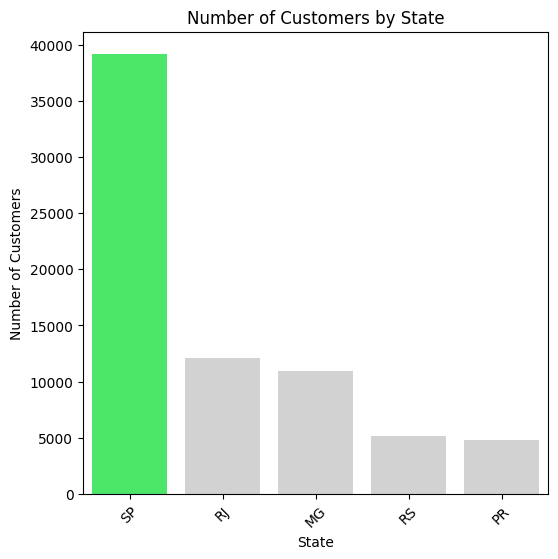

In [181]:
# Menampilkan grafik jumlah customers berdasarkan state
function_bar(customers_per_state.sort_values(by='customer_unique_id', ascending=False).head(5), "customer_state", "customer_unique_id","State", "Number of Customers",
             "Number of Customers by State", colors = ["#33FF57", "#D2D2D2", "#D2D2D2", "#D2D2D2", "#D2D2D2"])

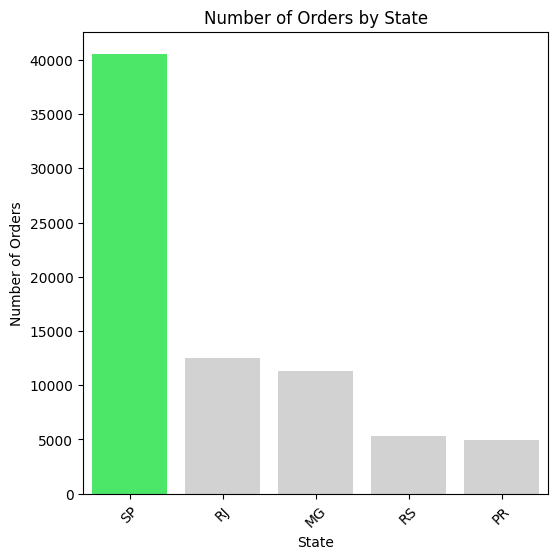

In [182]:
# Menampilkan grafik jumlah orderan customers berdasarkan state
function_bar(orders_per_state.sort_values(by='order_id', ascending=False).head(5), "customer_state", "order_id", "State", "Number of Orders",
             "Number of Orders by State", colors = ["#33FF57", "#D2D2D2", "#D2D2D2", "#D2D2D2", "#D2D2D2"])

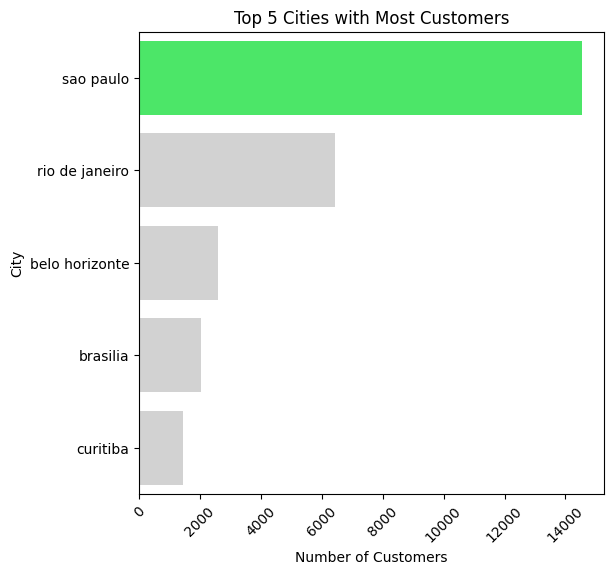

In [183]:
# Menampilkan grafik kota dengan customers terbanyak
function_bar(customers_per_city.sort_values(by='customer_unique_id', ascending=False).head(5), "customer_unique_id", "customer_city", "Number of Customers",
             "City", "Top 5 Cities with Most Customers", colors = ["#D2D2D2", "#D2D2D2", "#D2D2D2", "#D2D2D2", "#33FF57"])

### Pertanyaan 2: Wilayah apa saja yang menghasilkan pendapatan penjualan tertinggi?

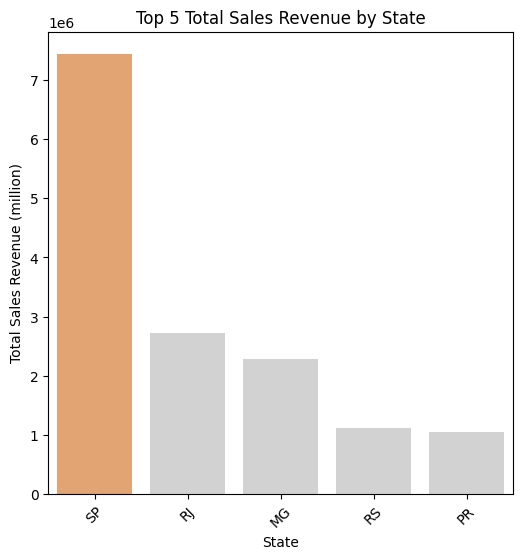

In [184]:
function_bar(revenue_per_state.sort_values(by='payment_value', ascending=False).head(5), "customer_state", "payment_value", "State",
             "Total Sales Revenue (million)", "Top 5 Total Sales Revenue by State", colors = ["#F4A261", "#D2D2D2", "#D2D2D2", "#D2D2D2", "#D2D2D2"])

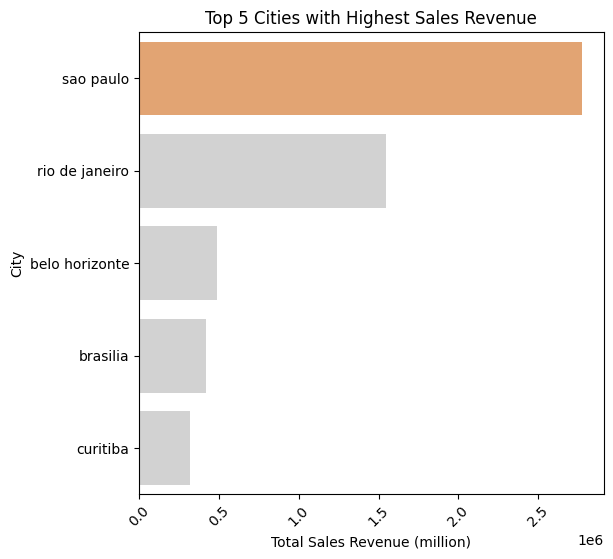

In [185]:
function_bar(revenue_per_city.sort_values(by='payment_value', ascending=False).head(5), "payment_value", "customer_city", "Total Sales Revenue (million)",
             "City", "Top 5 Cities with Highest Sales Revenue", colors = ["#D2D2D2", "#D2D2D2", "#D2D2D2", "#D2D2D2", "#F4A261"])

### Pertanyaan 3: Bagaimana tren penjualan bulanan dua tahun terakhir di e-commerce tersebut?

In [186]:
# Filter data hanya untuk tahun 2017
def function_line(data, x, y, xlabel, ylabel, title, xticks):
  plt.figure(figsize=(10, 5))
  ax = sns.lineplot(
      data=data,
      x=x,
      y=y,
      marker='o',
      linewidth=2,
      color='royalblue'
  )

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xticks(xticks)
  plt.show()

In [187]:
# Definisikan data untuk monthly sales 2 tahun terakhir (2018 dan 2017)
monthly_sales_2018 = monthly_sales[monthly_sales['order_purchase_month'].dt.year == 2018]
monthly_sales_2017 = monthly_sales[monthly_sales['order_purchase_month'].dt.year == 2017]

monthly_sales_2018['order_purchase_month'] = monthly_sales_2018['order_purchase_month'].dt.to_timestamp().dt.strftime('%b')
monthly_sales_2017['order_purchase_month'] = monthly_sales_2017['order_purchase_month'].dt.to_timestamp().dt.strftime('%b')

monthly_revenue_2018 = monthly_revenue[monthly_revenue['order_purchase_month'].dt.year == 2018]
monthly_revenue_2017 = monthly_revenue[monthly_revenue['order_purchase_month'].dt.year == 2017]

monthly_revenue_2018['order_purchase_month'] = monthly_revenue_2018['order_purchase_month'].dt.to_timestamp().dt.strftime('%b')
monthly_revenue_2017['order_purchase_month'] = monthly_revenue_2017['order_purchase_month'].dt.to_timestamp().dt.strftime('%b')

<ipython-input-187-a9cb5b37e378>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_sales_2018['order_purchase_month'] = monthly_sales_2018['order_purchase_month'].dt.to_timestamp().dt.strftime('%b')
<ipython-input-187-a9cb5b37e378>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_sales_2017['order_purchase_month'] = monthly_sales_2017['order_purchase_month'].dt.to_timestamp().dt.strftime('%b')
<ipython-input-187-a9cb5b37e378>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy 

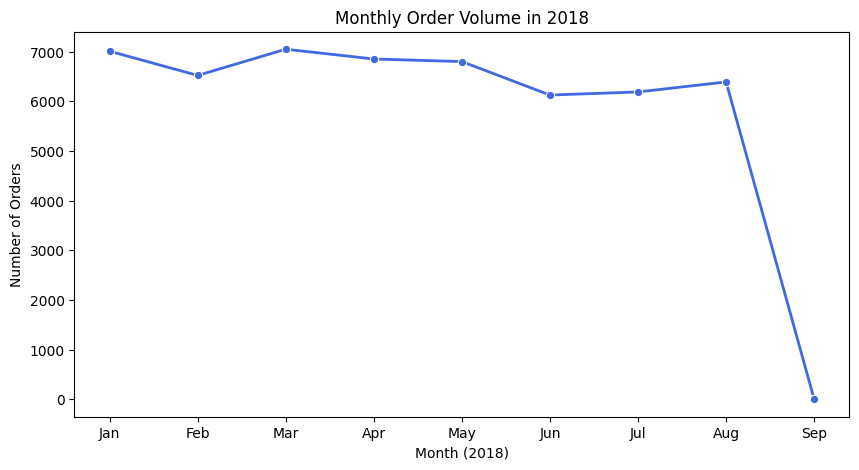

In [188]:
function_line(monthly_sales_2018, 'order_purchase_month', 'order_id', "Month (2018)", "Number of Orders", "Monthly Order Volume in 2018",
              monthly_sales_2018['order_purchase_month'])

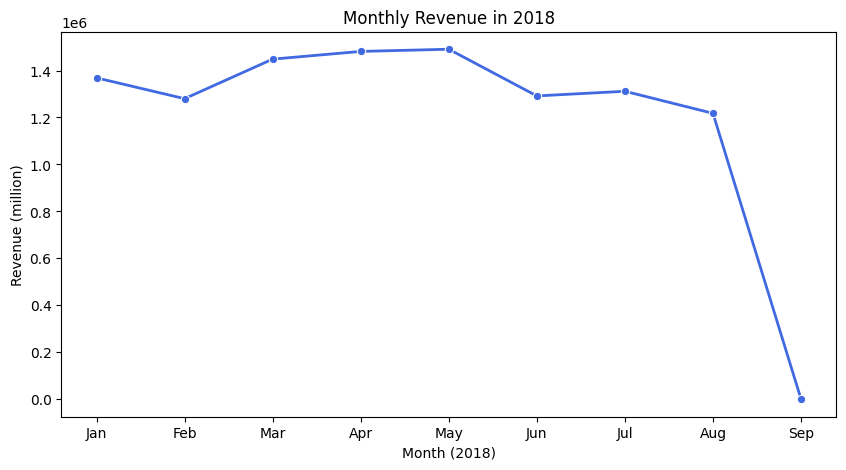

In [189]:
function_line(monthly_revenue_2018, 'order_purchase_month', 'payment_value', "Month (2018)", "Revenue (million)", "Monthly Revenue in 2018",
              monthly_revenue_2018['order_purchase_month'])

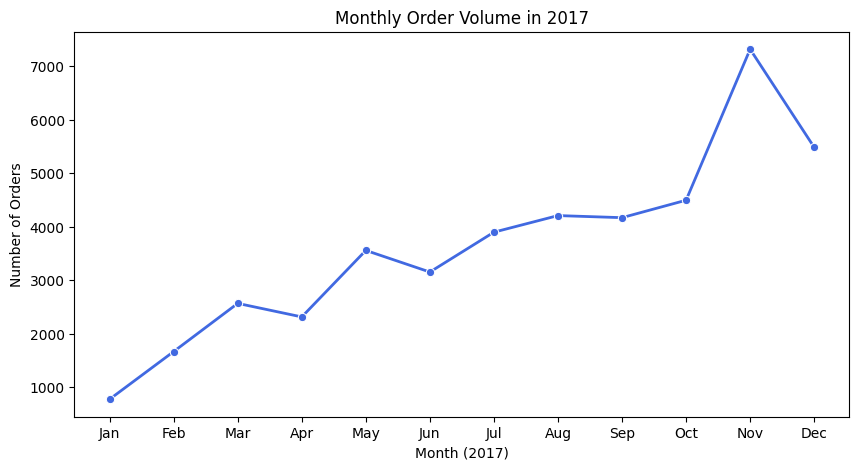

In [190]:
function_line(monthly_sales_2017, 'order_purchase_month', 'order_id', "Month (2017)", "Number of Orders", "Monthly Order Volume in 2017",
              monthly_sales_2017['order_purchase_month'])

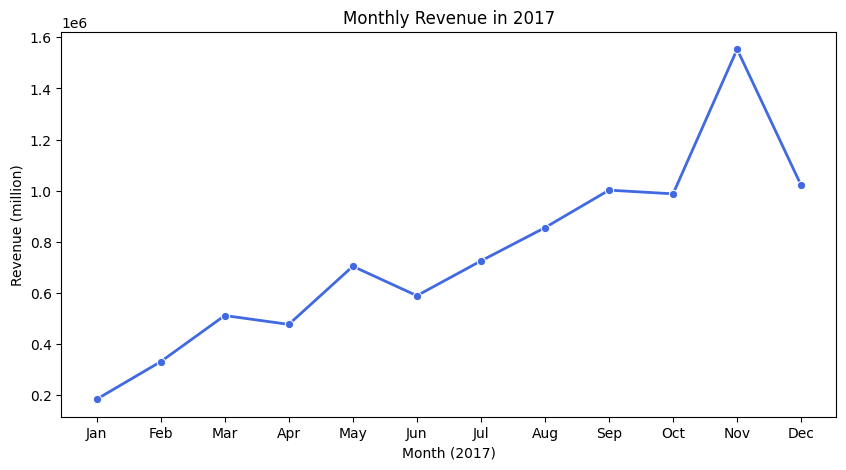

In [191]:
function_line(monthly_revenue_2017, 'order_purchase_month', 'payment_value', "Month (2017)", "Revenue (million)", "Monthly Revenue in 2017",
              monthly_revenue_2017['order_purchase_month'])

### Pertanyaan 4: Bagaimana kontribusi kategori produk terhadap pendapatan?

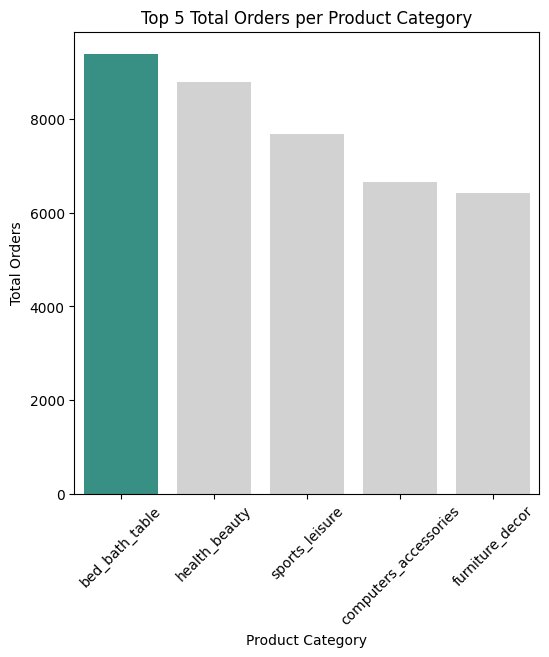

In [192]:
function_bar(total_order_by_category.sort_values(by='order_id', ascending=False).head(5), "product_category_name_english", "order_id", "Product Category",
             "Total Orders", "Top 5 Total Orders per Product Category", colors = ["#2A9D8F", "#D2D2D2", "#D2D2D2", "#D2D2D2", "#D2D2D2"])

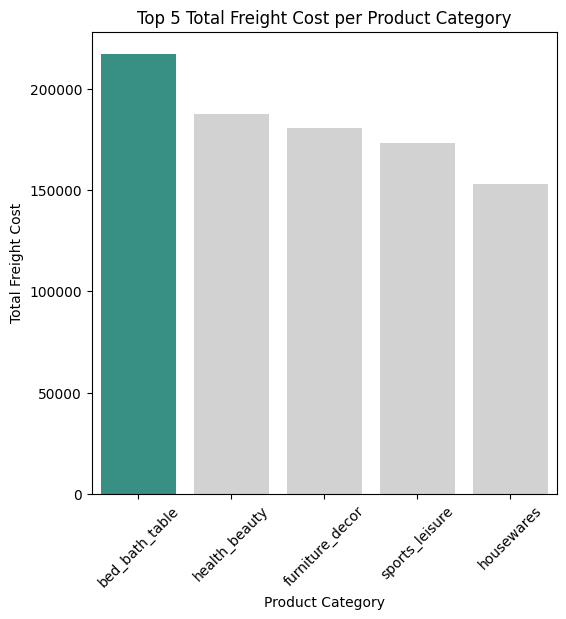

In [193]:
function_bar(cost_freight.sort_values(by='freight_value', ascending=False).head(5), "product_category_name_english", "freight_value", "Product Category",
             "Total Freight Cost", "Top 5 Total Freight Cost per Product Category", colors = ["#2A9D8F", "#D2D2D2", "#D2D2D2", "#D2D2D2", "#D2D2D2"])

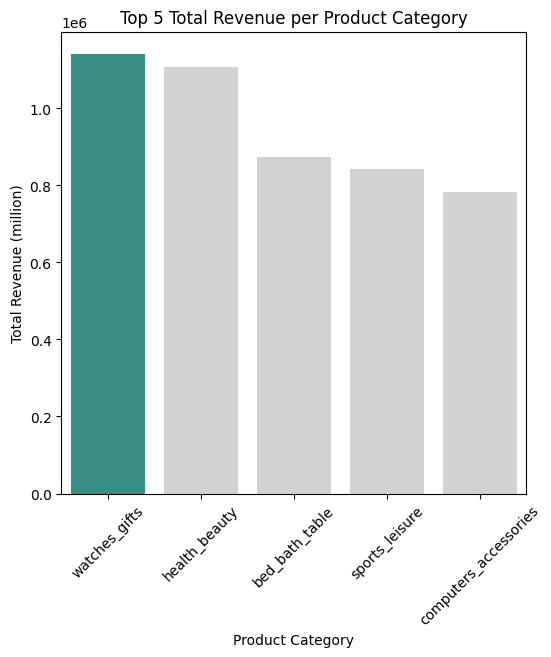

In [194]:
function_bar(category_revenue.sort_values(by='real_revenue', ascending=False).head(5), "product_category_name_english", "real_revenue", "Product Category",
             "Total Revenue (million)", "Top 5 Total Revenue per Product Category", colors = ["#2A9D8F", "#D2D2D2", "#D2D2D2", "#D2D2D2", "#D2D2D2"])

### Pertanyaan 5: Wilayah mana yang mengalami rata-rata keterlambatan pengiriman paling tinggi?

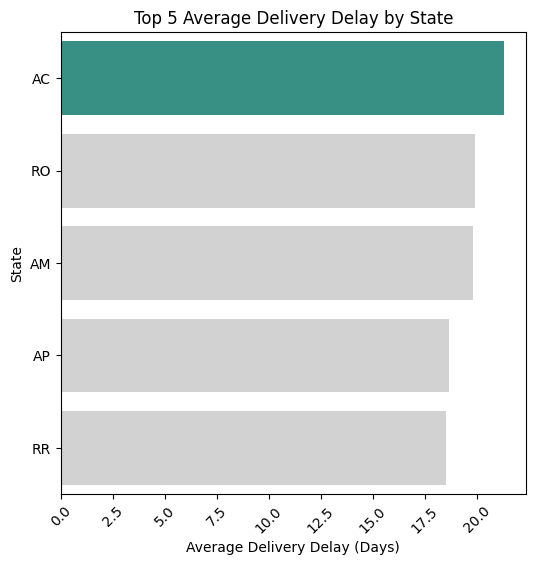

In [195]:
function_bar(late_delivery_per_state.sort_values('delivery_delay', ascending=False).head(5), "delivery_delay", "customer_state", "Average Delivery Delay (Days)",
             "State", "Top 5 Average Delivery Delay by State", colors = ["#D2D2D2", "#D2D2D2", "#D2D2D2", "#D2D2D2", "#2A9D8F"])

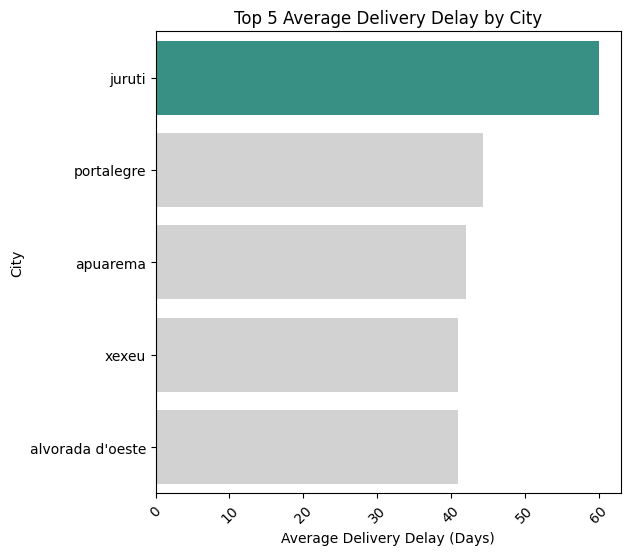

In [196]:
function_bar(late_delivery_per_city.sort_values('delivery_delay', ascending=False).head(5), "delivery_delay", "customer_city", "Average Delivery Delay (Days)",
             "City", "Top 5 Average Delivery Delay by City", colors = ["#D2D2D2", "#D2D2D2", "#D2D2D2", "#2A9D8F"])


### Insight yang diperoleh dari hasil Data Visualization & Explanatory Analysis

**Insight:**
1. **Demografi Pelanggan Berdasarkan Lokasi Geografis**
- Grafik menunjukkan bahwa negara bagian 'SP' merupakan wilayah dengan jumlah customer terbanyak dan orderan customer tertinggi diantara yang lainnya, bahkan jauh mengungguli urutan 2 lebih dari 3x lipat (negara bagian 'RJ'). Ini dapat mengindikasikan bahwa pasar di negara bagian 'SP' ini sangat besar, aktif, dan ada kemungkinan didorong oleh perekonomian yang lebih kuat. Sedangkan untuk urutan 2 ('RJ') dan 3 ('MG') meskipun jauh dari negara bagian 'SP' pada segala sisi, namun kedua negara bagian ini memiliki potensi pasar yang baik setelah urutan 1.  
- Grafik 5 kota dengan customer terbanyak menunjukkan bahwa kota Sao Paulo menjadi kota dengan customer terbanyak jauh menungguli urutan dibawahnya hingga lebih dari 50%. Hal ini menegaskan peran kota tersebut sebagai pusat utama aktivitas e-commerce di negara bagian 'SP'. Meskipun demikian, kota Rio de Janeiro ('RJ') dan Belo Horizonte ('MG')juga menjadi pusat aktivitas e-commerce di negara bagiannya masing-masing.
- Pelanggan yang lebih banyak tinggal di kota-kota besar menunjukkan betapa pentingnya wilayah metropolitan terhadap suatu negara bagian untuk penyebaran e-commerce. Hal ini menunjukkan bahwa strategi logistik dan pemasaran harus lebih berkonsentrasi untuk memenuhi permintaan tinggi di kota-kota utama dalam suatu negara bagian, dengan mempertimbangkan perbedaan karakteristik dan potensi pasar tiap wilayah.


2. **Wilayah dengan Pendapatan Penjualan Tertinggi**
- Negara bagian 'SP' kembali mendominasi total pendapatan penjualan dengan keunggulan lebih dari 200% untuk urutan dibawahnya (negara bagian 'RJ'). Hal ini menunjukkan keselarasan antara volume dan nilai transaksi tinggi yang mencerminkan daya beli yang kuat di wilayah ini. Meskipun tertinggal hampir 200% dari segi total pendapatan penjualan, namun negara bagian 'RJ' dan 'MG' masih konsisten untuk memberikan kontribusi pada e-commerce yang menunjukkan potensi yang tetap menarik.
- Kota dengan pendapatan penjualan tertinggi kembali diraih oleh Sao Paulo yang kembali menegaskan perannya sebagai pusat ekonomi yang cukup kuat.
- Penjualan yang tinggi di kota besar memperlihatkan bahwa e-commerce tidak hanya dipengaruhi oleh jumlah pelanggan saja, tetapi juga oleh nilai transaksi yang dihasilkan. Ini akan membuka peluang untuk strategi yang lebih terfokus pada hal-hal tertentu (seperti promosi) dan penawaran khusus pada wilayah dengan nilai transaksi yang rendah.

3. **Tren Penjualan Bulanan 2 Tahun Terakhir**
- Grafik bulanan e-commerce pada tahun 2018 memperlihatkan jumlah orderan tertinggi berada di bulan Maret, namun setelah itu menunjukkan tren penurunan. Hal ini kurang selaras dengan pendapatan penjualan yang diraih, dimana terjadi tren peningkatan hingga bulan Maret dan meraih puncak penjualan tertinggi di bulan Mei, meskipun setelah itu juga mengalami penurunan. Di dalam grafik terjadi juga penurunan signifikan di bulan September yang disebabkan oleh pengambilan data terakhir dilakukan pada bulan September 2018 (hanya ada 1 orderan).
- Grafik bulanan e-commerce pada tahun 2017 cukup berbeda dengan tahun 2018, dimana terjadi keselarasan tren peningkatan pada orderan dan pendapatan penjualan hingga keduanya mencapai puncaknya pada bulan November.
- Dari kedua tren penjualan bulanan 2 tahun terakhir, memperlihatkan dinamika yang berbeda dalam perilaku pembelian konsumen. Tahun 2017 cenderung mengalami peningkatan yang stabil dan tahun 2018 menghadirkan tantangan tersendiri dikarenakan kurang selarasnya antara jumlah orderan dan pendapatan penjualan yang terjadi dibulan yang berbeda. Diharapkan dari temuan ini bisa merancang strategi promosi dan penyesuaian operasional yang lebih responsif terhadap pola-pola musiman dan perilaku konsumen di masing-masing periode.

4. **Kontribusi Kategori Produk terhadap Pendapatan**
- Kategori 'bed_bath_table' mencatatkan orderan terbanyak, diikuti oleh 'health_beauty' dan 'sports_leisure'. Ini memperlihatkan bahwa kategori produk-produk tersebut sangat diminati oleh customer yang ada di e-commerce tersebut.
- Grafik 5 Kategori dengan jumlah Freight Cost (biaya pengiriman) tertinggi menunjukkan bahwa 'bed_bath_table' menjadi kategori dengan biaya pengiriman terbanyak disusul oleh 'health_beauty'. Jika melihat grafik sebelumnya, terdapat keselarasan antara jumlah orderan yang banyak diikuti oleh jumlah biaya pengiriman yang banyak juga untuk dua kategori tersebut. Sedangkan untuk 'sports_leisure', turun ke urutan 4 dan digeser oleh 'furniture_decor'. Kategori 'furniture_decor' bisa menandakan bahwa meskipun menempati urutan 5 dengan jumlah orderan terbanyak, namun biaya pengiriman yang dikeluarkan untuk sekali pembelian bisa lebih besar dari 4 urutan teratas lainnya.
- Meskipun kategori 'bed_bath_table' unggul dalam jumlah orderan, namun untuk jumlah pendapatan tertinggi ditempati oleh 'watches_gifts', diikuti oleh 'health_beauty', lalu kemudian barulah 'bed_bath_table'. Perbedaan ini dapat menggambarkan bahwa meskipun jumlah orderan pada kategori 'watches_gifts', ternyata setiap transaksi yang dilakukan menghasilkan pendapatan yang lebih besar diantara kategori lainnya.
- Dengan demikian, perlu adanya evaluasi untuk kategori dengan jumlah orderan tinggi (contohnya untuk kategori 'bed_bath_table'). Freight cost yang tinggi mungkin akan menekan margin keuntungan. Sehingga, penetapan harga dan negosiasi biaya pengiriman harus ditinjau kembali agar pendapatan bisa bertambah.
- Selain itu, strategi promosi dan pemasaran yang mungkin telah diterapkan pada kategori 'watches_gifts' dapat menjadi acuan untuk kategori lain dengan tujuan meningkatkan transaksi setiap orderannya.
- Hasil ini juga dapat dijadikan bahan untuk mengidentifikasi kategori apa saja yang masih perlu untuk dioptimalkan dan yang sudah menunjukkan kinerja unggul agar setiap kategori yang ada bisa memberi kontribusi terhadap pendapatan secara keseluruhan

5. **Wilayah dengan Rata-rata Keterlambatan Pengiriman Tertinggi**
- Wilayah dengan rata-rata keterlambatan tertinggi berdasarkan negara bagiannya yaitu daerah 'AC', 'RO', dan 'AP' dengan kisaran waktu rata-rata 19-21 hari. Hal ini bisa saja terjadi karena adanya kendala pada infrastruktur logistik atau rute distribusi di wilayah ini.
- Untuk daerah perkotaan dengan rata-rata keterlambatan waktu pengiriman sedikit lebih ekstrim dikarenakan beberapa kota teratas, sepert Juruti (60 hari), Portalegre (44.33 hari), dan Apuarema (42 hari) memiliki rata-rata yang jauh melebihi level negara bagian. Faktor-faktor yang mungkin menjadi pendukung yaitu kondisi geografis yang menantang, keterbatasan infrastruktur, atau isu operasional lokal mungkin menjadi penyebab utama.
- Berdasarkan apa yang telah diperoleh, beberapa hal bisa dilakukan, seperti melakukan analisis lebih lanjut terhadap daerah-daerah ini untuk mencari tahu penyebab sesungguhnya keterlambatan pengiriman, merumuskan strategi tepat untuk mengoptimalkan rute pengiriman, dan lain sebagainya.


## Analisis Lanjutan (Opsional)

#### Menerapkan RFM Analysis untuk dataset ini

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

Tujuan analisis ini:
Memungkinkan perusahaan untuk meningkatkan pendapatan dengan menargetkan kelompok pelanggan tertentu yang sudah ada (segmentasi pelanggan)

In [197]:
# Konversi tanggal ke tipe datetime dan mendapatkan tanggal pembelian terakhir
customer_orders_with_sales_category_df_cleaned['order_purchase_timestamp'] = pd.to_datetime(customer_orders_with_sales_category_df_cleaned['order_purchase_timestamp'])
latest_date = customer_orders_with_sales_category_df_cleaned['order_purchase_timestamp'].max()


# Hitung RFM metrics
rfm_df = customer_orders_with_sales_category_df_cleaned.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
  }).reset_index()

# Rename kolom agar lebih jelas
rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
}, inplace=True)

print(rfm_df.head())

                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19
2  0000f46a3911fa3c0805444483337064      542          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      293          1    196.89


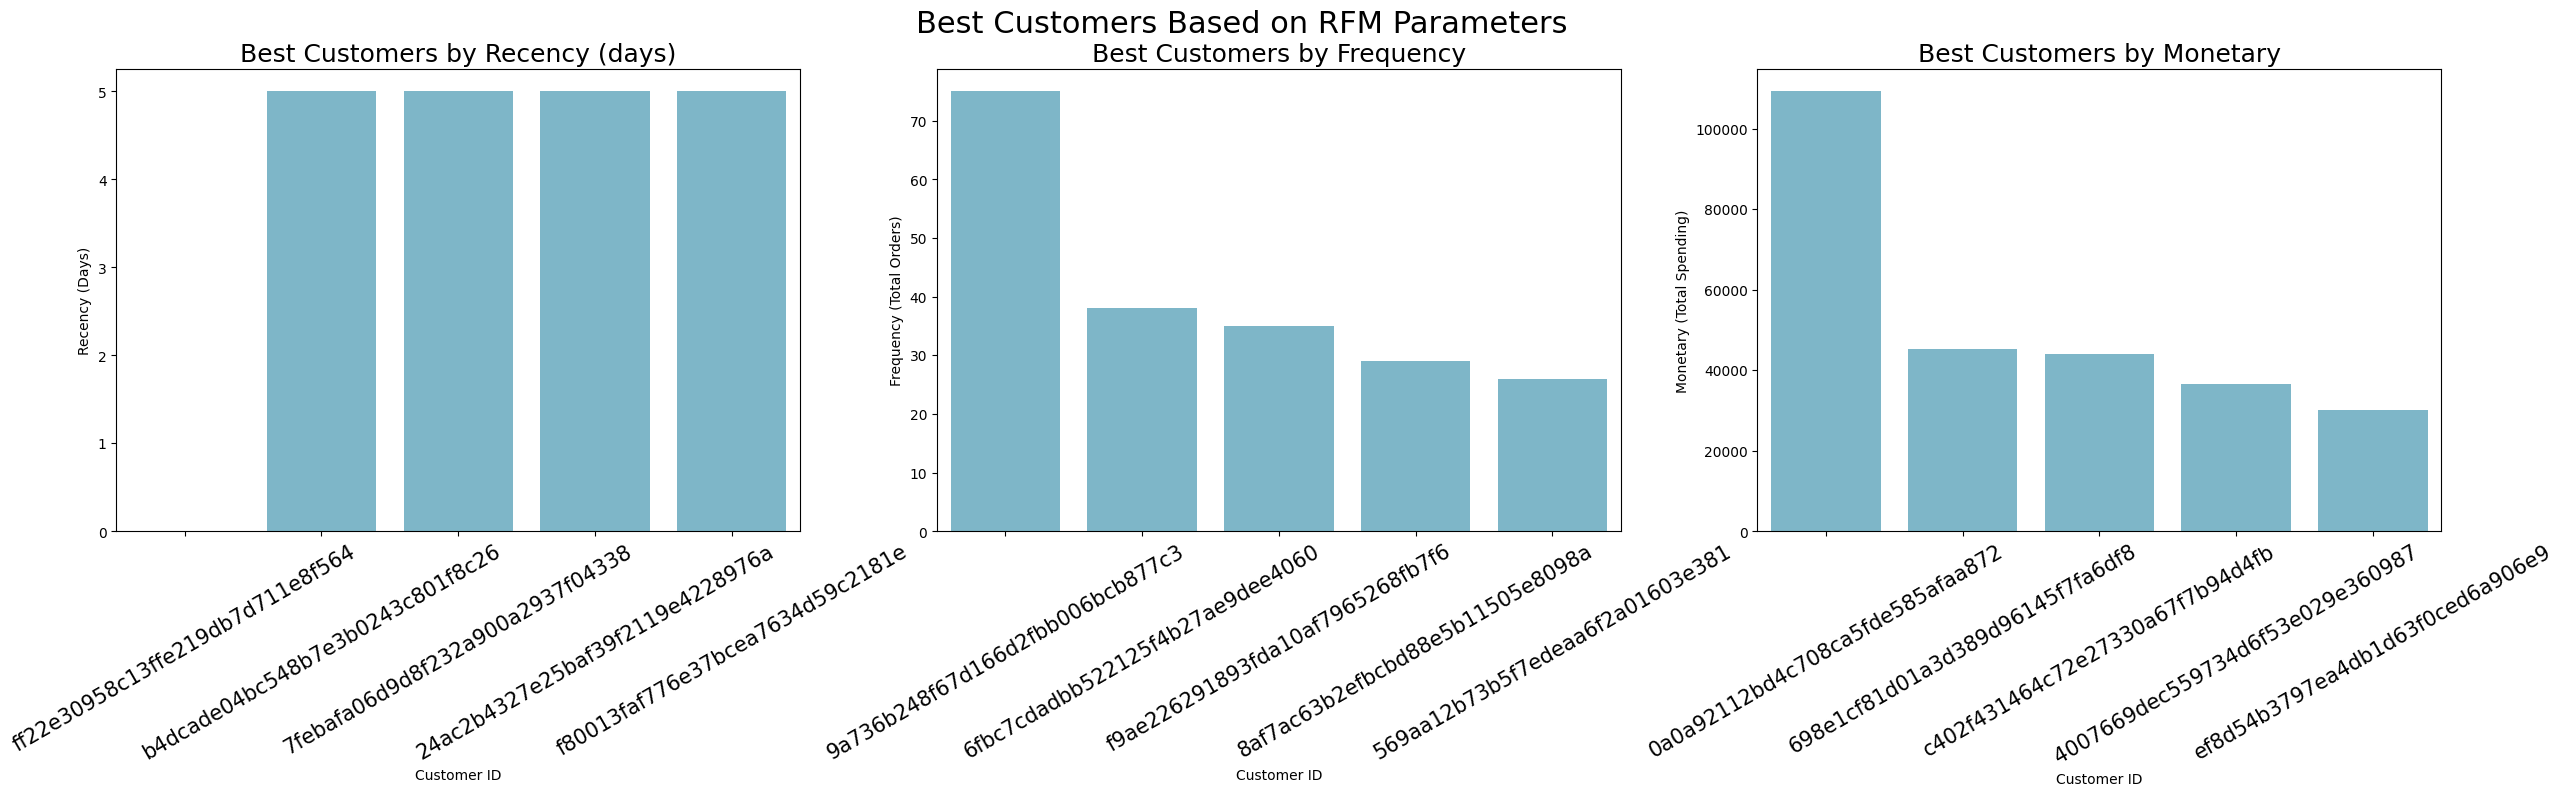

In [198]:
# Identifikasi best customer dengan RFM ini
palette_color = ["#72BCD4"] * 5

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Top 5 Pelanggan berdasarkan Recency
sns.barplot(
    y='Recency',
    x="customer_unique_id",
    hue="customer_unique_id",
    data=rfm_df.sort_values(by='Recency', ascending=True).head(5),
    palette=palette_color,
    ax=ax[0]
)
ax[0].set_title("Best Customers by Recency (days)", fontsize=18)
ax[0].set_xlabel("Customer ID")
ax[0].set_ylabel("Recency (Days)")
ax[0].tick_params(axis='x', labelsize=15, rotation=30)

# Top 5 Pelanggan berdasarkan Frequency
sns.barplot(
    y="Frequency",
    x="customer_unique_id",
    hue="customer_unique_id",
    data=rfm_df.sort_values(by="Frequency", ascending=False).head(5),
    palette=palette_color,
    ax=ax[1]
)
ax[1].set_title("Best Customers by Frequency", fontsize=18)
ax[1].set_xlabel("Customer ID")
ax[1].set_ylabel("Frequency (Total Orders)")
ax[1].tick_params(axis='x', labelsize=15, rotation=30)

# Top 5 Pelanggan berdasarkan Monetary
sns.barplot(
    y="Monetary",
    x="customer_unique_id",
    hue="customer_unique_id",
    data=rfm_df.sort_values(by="Monetary", ascending=False).head(5),
    palette=palette_color,
    ax=ax[2]
)
ax[2].set_title("Best Customers by Monetary", fontsize=18)
ax[2].set_xlabel("Customer ID")
ax[2].set_ylabel("Monetary (Total Spending)")
ax[2].tick_params(axis='x', labelsize=15, rotation=30)

plt.suptitle("Best Customers Based on RFM Parameters", fontsize=22)
plt.show()

#### Insight dari RFM Analysis ini

- Customer terbaik berdasarkan Recency
  - Semakin kecil angka Recency, menandakan customer tersebut sering melakukan pembelian di e-commerce ini
  - Customer recency terendah yaitu dengan id 'ff22e30958c13ffe219db7d711e8f564' dengan Recency 0 hari (paling terbaru melakukan pembelian). Sedangkan untuk 4 customer teratas lainnya memiliki Recency 5 hari (5 hari lalu terakhir melakukan pembelian).

- Customer terbaik berdasarkan Frequency
  - Parameter ini lebih menyoroti customer dengan jumlah orderan terbanyak.
  - Customer frequency tertinggi yaitu dengan id '9a736b248f67d166d2fbb006bcb877c3' dengan jumlah orderan sekitar 70-an. Sedangkan untuk 4 lainnya memiliki jumlah orderan dikisaran 40-an kebawah.

- Customer terbaik berdasarkan Monetary
  - Jika Frequency menyoroti jumlah orderan, maka untuk Monetary lebih melihat jumlah pengeluaran terbesar dari customer.
  - Customer dengan Monetary tertinggi yaitu dengan id 0a0a92112bd4c708ca5fde585afaa872 dengan jumlah pengeluaran sebanyak lebih dari 100,000. Untuk 4 lainnya jumlah pengeluarannya dikisaran 50,000 ke bawah.

- Jika dilihat secara keseluruhan, tidak ada customer yang muncul dibeberapa kategori sekaligus
- Beberapa pendekatan dapat dilakukan untuk menyesuaikan strategi pemasaran terhadap customer teratas ini melalui email marketing, penawaran khusus, kupon diskon, dll.
- Pada akhirnya analisis ini akan berguna untuk memastikan loyalitas customer terjaga dengan baik, mengoptimalkan biaya pemasaran pada customer yang paling menjanjikan, dan lain sebagainya.


In [199]:
customer_orders_with_sales_category_df_cleaned.to_csv("all_df.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 (Bagaimana demografi pelanggan e-commerce berdasarkan lokasi geografisnya?)
    - Data memperlihatkan dominasi negara bagian 'SP' (39221 customer aktif, 40562 jumlah orderan customer) dibandingkan 2 negara bagian lainnya, seperti 'RJ' (12063 customer aktif, 12.509 order) dan 'MG' (10.977 customer aktif, 11.328 order). Hal ini menandakan tingginya tingkat perekonomian dan aktivitas transaksi yang intens di wilayah 'SP' ini. Dengan demikian, strategi pemasaran, optimasi logistik, fokus investasi, dll. bisa diprioritaskan pada 'SP' dan 2 negara bagian lainnya ('RJ' dan 'MG') untuk memenuhi permintaan transaksi yang tinggi dan potensi pertumbuhan besar.
    - Negara bagian lainnya ('RS', 'PR', 'SC', 'BA', 'DF', 'ES', dan 'GO') masih bisa memberikan kontribusi meskipun jumlahnya lebih kecil. Dengan pendekatan pemasaran yang lebih tersegmentasi diharapkan wilayah tersebut dapat menjadi area pengembangan untuk peningkatan pasar secara menyeluruh.
    - Untuk yang berdasarkan wilayah kota, data mengungkapkan bahwa kota Sao Paulo menjadi pusat dengan 14534 customer, jauh melampaui kota lainnya seperti Rio de Janiero (6.444 customer) dan Belo Horizonte (2.595 customer). Meskipun demikian, ketiga kota ini menjadi pusat utama aktivitas e-commerce di masing-masing negara bagian. Oleh karena itu, kota-kota besar semacam ini perlu untuk dimaksimalkan potensi pasarnya dengan penyesuaian operasional dan promosi marketing yang tepat.      

- Conclution pertanyaan 2 (Wilayah apa saja yang menghasilkan pendapatan penjualan tertinggi?)
    - Negara bagian 'SP' mencatat pendapatan penjualan terbesar (7,448,810.65), jauh mengungguli negara bagian lainnya. Ini sejalan dengan penyebaran customer yang berpusat di negara bagian ini yang sudah pasti berkarakteristik konsumen yang memiliki daya beli kuat. Dengan demikian, perlu adanya prioritas investasi pada infrastruktur, pemasaran, dan pengelolaan logistik di SP untuk mempertahankan keunggulan ini serta mengoptimalkan pertumbuhan lebih lanjut.
    - Negara bagian seperti RJ (2.721.409,25) dan MG (2.283.632,39) meskipun tidak sekuat SP, tetap menunjukkan kontribusi yang signifikan terhadap total pendapatan penjualan. Begitu juga negara bagian RS, PR, BA, dan SC memberikan kontribusi yang tidak bisa diabaikan. Sehingga perlu dilakukan segmentasi pasar dan penyesuaian strategi promosi agar wilayah ini mengalami peningkatan pasar secara menyeluruh.
    - Kota Sao Paulo memimpin penjualan tertinggi dengan 2.772.262,07. Kota ini bukan hanya pusat bisnis dan keuangan negara bagian 'SP', tetapi juga menjadi pusat pertumbuhan e-commerce. Meskipun pendapatannya lebih rendah, kota-kota seperti Rio de Janeiro (1.544.149,81) dan Belo Horizonte (488.427,65) masih memiliki potensi pasar yang besar. Strategi berbeda perlu diterapkan di setiap kota yang lebih terfokus pada hal-hal tertentu (seperti promosi) dan penawaran khusus pada wilayah perkotaan dengan nilai transaksi yang rendah.

- Conclution pertanyaan 3 (Bagaimana tren penjualan bulanan dua tahun terakhir di e-commerce tersebut?)
    - Analisis tren penjualan bulanan untuk 2 tahun terakhir memperlihatkan pola yang berbeda dalam perilaku pembelian konsumen. Di tahun 2017, terdapat tren peningkatan pada jumlah orderan dan pendapatan yang memuncak pada bulan November, sedangkan tahun 2018 menghadirkan tantangan tersendiri dikarenakan terjadi ketidaksesuaian di mana orderan tertinggi muncul pada bulan Maret, sedangkan pendapatan mencapai puncaknya pada Mei. Penurunan drastis di bulan September 2018 juga mengindikasikan adanya permasalahan dalam pengambilan data. Temuan ini menuntut perlunya strategi promosi dan penyesuaian operasional yang lebih responsif terhadap pola-pola musiman dan perilaku konsumen di masing-masing periode agar dapat dioptimalkan secara maksimal.
- Conclution pertanyaan 4 (Bagaimana kontribusi kategori produk terhadap total pendapatan?)
    - Kategori 'bed_bath_table' mencatatkan jumlah orderan dan beban biaya pengiriman terbanyak berdasarkan grafik yang telah ditampilkan sebelumnya. Sedangkan untuk kategori 'health_beauty', meskipun jumlah orderan dan beban biaya pengirimannya dibawah 'bed_bath_table', namun untuk pendapatan tetap konsisten berada di urutan 2. Berbanding terbalik dengan 'bed_bath_table' yang berada di urutan 3 dengan pendapatan terbanyak.
    - Kategori dengan pendapatan tertinggi justru diperoleh 'watches_gifts' meskipun tidak berada dalam 5 besar untuk jumlah orderan terbanyak. Tentunya hal ini mengungkapkan bahwa volume orderan tinggi tidak selalu berkorelasi dengan nilai pendapatan optimal.
    - Oleh karena itu, perlu evaluasi mendalam mengenai strategi penetapan harga dan negosiasi biaya pengiriman untuk kategori dengan orderan tinggi agar margin keuntungan dapat ditingkatkan. Selain itu, strategi promosi dan pemasaran yang mungkin telah diterapkan pada kategori 'watches_gifts' dapat menjadi acuan untuk kategori lain dengan tujuan mengoptimalkan kategori lainnya yang memiliki potensi pendapatan tinggi.
- Conclusion pertanyaan 5 (Wilayah mana yang mengalami rata-rata keterlambatan pengiriman paling tinggi?)
    - Wilayah-wilayah tertentu seperti negara bagian AC, RO, dan AP menunjukkan rata-rata keterlambatan pengiriman yang sangat tinggi (19-21 hari), sementara di tingkat kota terdapat kasus ekstrem seperti di Juruti, Portalegre, dan Apuarema (40-60 hari). Temuan ini mengindikasikan adanya tantangan serius dalam hal infrastruktur logistik dan manajemen distribusi di wilayah tersebut. Keterlambatan ini berpotensi menurunkan kepuasan pelanggan dan merusak reputasi layanan e-commerce. Oleh karena itu, sangat penting dilakukan analisis lebih lanjut untuk mengidentifikasi akar permasalahan dan merancang strategi perbaikan, misalnya dengan optimasi rute distribusi dan peningkatan infrastruktur logistik untuk mengurangi keterlambatan dan meningkatkan efisiensi operasional.